**Importing the Dependencis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Data Collection and Analysis**

In [2]:
# loading the data from csv file to pandas DataFrame
customer_data = pd.read_csv("Mall_Customers.csv")

In [3]:
# first 5 rows of the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Choosing the Annual Income Column and Spending Score Column**

In [7]:
X = customer_data.iloc[:,[3,4]].values

**:** --> mentioning about taking 3 and 4 columns but not the rows of the data

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Choosing the number of clusters**

**WCSS --> Within Clusters Sum of Squares: **

**WCSS (Within-Cluster Sum of Squares)** is a metric used in cluster analysis, particularly in the context of **K-means clustering**, to evaluate the compactness of the clusters formed. It quantifies how tightly the data points are grouped within each cluster.

### Explanation:

1. **Clustering**: In K-means clustering, the objective is to divide the data into **K** clusters, where each cluster consists of data points that are similar to each other and different from those in other clusters.

2. **WCSS Formula**: The WCSS is calculated as the sum of squared distances between each data point and the centroid (mean) of the cluster it belongs to.

   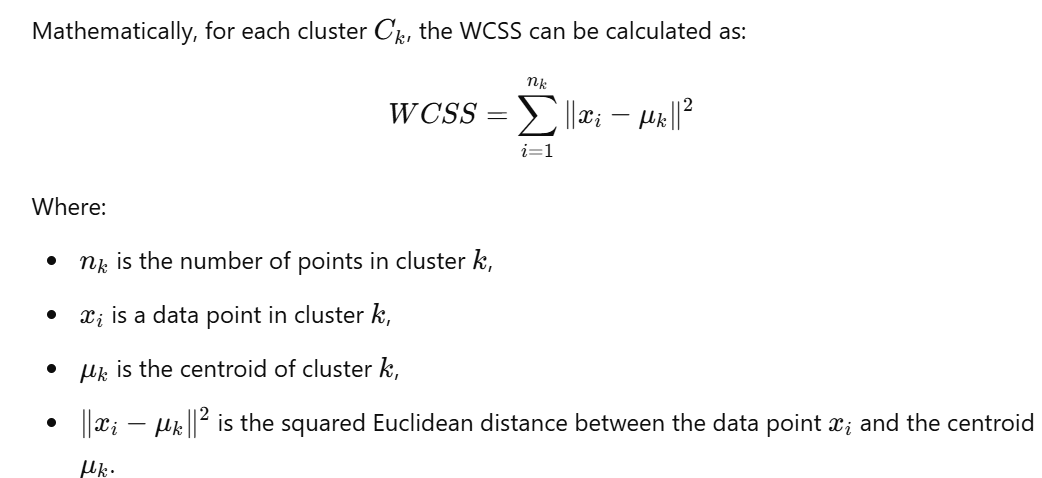

3. **Interpretation**:
   - **Lower WCSS**: A lower WCSS indicates that the data points are closer to the centroid, suggesting that the clusters are compact and well-defined.
   - **Higher WCSS**: A higher WCSS indicates that the data points are spread out from the centroid, meaning the clusters are less compact and less homogeneous.

4. **Use in Elbow Method**:
   - WCSS is commonly used in the **Elbow Method** for choosing the optimal number of clusters \( K \).
   - By plotting WCSS against the number of clusters, you look for an "elbow" in the graph, which corresponds to a point where adding more clusters does not significantly reduce the WCSS. The number of clusters at this point is often considered the best choice for the model.

### Example:
If you are running K-means clustering and calculate WCSS for a range of cluster numbers (e.g., from 1 to 10), you can observe the point at which WCSS starts to decrease more slowly. That "elbow" is typically the best number of clusters for your dataset.

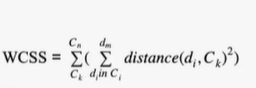

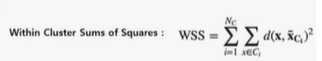

In [10]:
# finding wcss value for different number of clusters
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, 
        message="KMeans is known to have a memory leak")

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   random_state = 42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

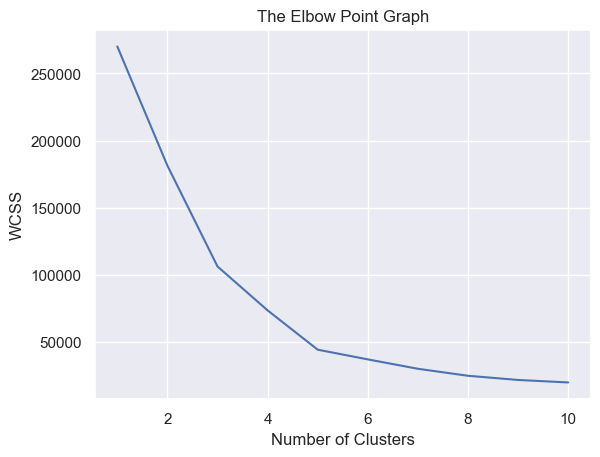

In [11]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Optimum Number of Clusters = 5**

**Training the K-Means Clustering Model**

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', 
               random_state = 0)

In [13]:
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


**5 - Clusters - 0, 1, 2, 3, 4**

**Visualizing all the Clusters**

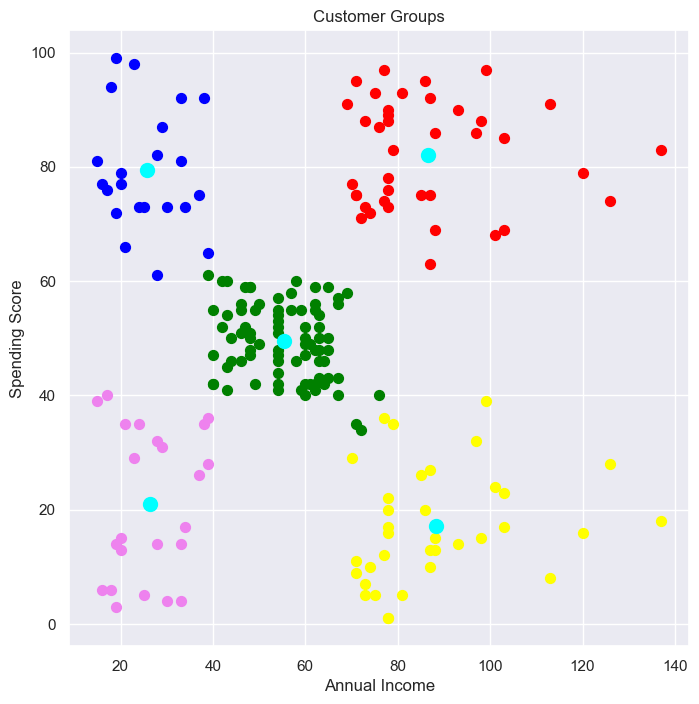

In [18]:
# Plotting all the clusters and their centroids

plt.figure(figsize = (8,8))
plt.scatter(X[Y == 0,0], X[Y == 0,1], s = 50, c = 'green',
           label = 'Cluster 1')
plt.scatter(X[Y == 1,0], X[Y == 1,1], s = 50, c = 'red',
           label = 'Cluster 2')
plt.scatter(X[Y == 2,0], X[Y == 2,1], s = 50, c = 'yellow',
           label = 'Cluster 3')
plt.scatter(X[Y == 3,0], X[Y == 3,1], s = 50, c = 'violet',
           label = 'Cluster 4')
plt.scatter(X[Y == 4,0], X[Y == 4,1], s = 50, c = 'blue',
           label = 'Cluster 5')

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan',
           label = 'Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()